In [1]:
from src.bmlr import BMLR
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # for building the model
import scipy.stats as ss
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/rafal/miniconda3/envs/topoexplain/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Build some toy example

In [2]:
n_pts = 2000
dim_pts = 4

points = ss.uniform().rvs((n_pts, dim_pts))
y_train = 2*points[:, 0] -4*points[:, 1] + 7*points[:, 2] -points[:, 3] + 10*points[:, 0]*points[:, 1] + 0.1*points[:, 3]**2
# add gausian noise
noise = ss.norm().rvs(n_pts)
y_train += noise
X_train = pd.DataFrame(points, columns=[f'X{i}' for i in range(dim_pts)])
X_train

,X0,X1,X2,X3
0,0.576069,0.697595,0.943908,0.789395
1,0.192264,0.026760,0.352226,0.819134
2,0.658561,0.382251,0.048240,0.660995
3,0.912414,0.243365,0.550112,0.961567
4,0.603275,0.272594,0.197159,0.480803
...,...,...,...,...
1995,0.523231,0.489071,0.620106,0.459409
1996,0.790208,0.384369,0.019622,0.405246
1997,0.002650,0.188866,0.357058,0.239368
1998,0.673488,0.834987,0.326433,0.087967


## Build LinearRegressions inside balls and visualize the coefficients using BM graphs
(Visualization of the Intercepts is not yet supported)

In [7]:
bmr = BMLR(eps=0.5) 
# fit model to data
bmr.fit(X_train, y_train)
bmr.create_graph()

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1789.39it/s]


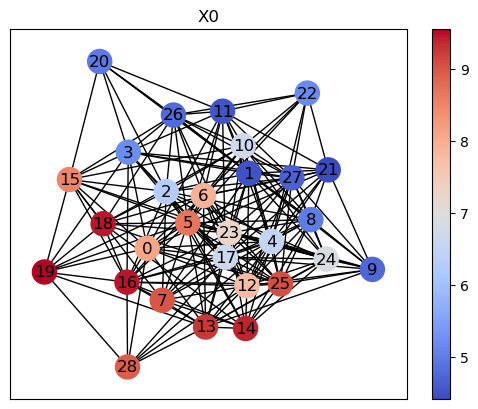

In [10]:
bmr.plot_coefficient(feature='X0')

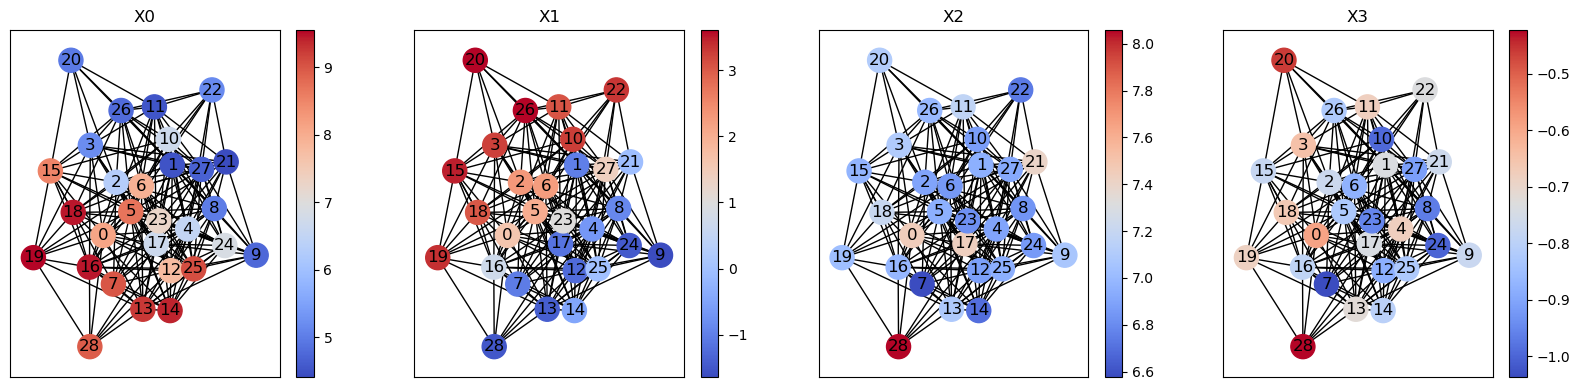

In [13]:
# make plots for all features
fig, axs = plt.subplots(1, len(X_train.columns), figsize=(20, 4.5))
for feature, ax in zip(X_train.columns, axs):
    bmr.plot_coefficient(feature=feature, ax=ax)